## Unit 1 Concept check

**Time:** 30 minutes

This is intended to be a quick review of the concepts we've covered up until now. Each question shouldn't take too long, so if you don't know an answer, skip it and come back to it later if there's time. Oh, and think of this as a "closed book" assessmnt, so no "Googling". :)

*This won't be graded, but will help Zunayed and me to assess student understanding in the class.*

**We ask that you submit this notebook with your answers to [[dropbox link]]**

In [120]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for plotting
sns.mpl.rc("figure", figsize=(12,4))
sns.set_context("notebook", font_scale=2)

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Question 1: How many rows does this dataframe have?

Answer:     

In [131]:
len(data)

# Can also do `data.shape[0]`

200

#### Question 2: What is the average sales?

Answer:

In [132]:
data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

#### Question 3: Does the TV column have any repeated values?

Answer: Yes!

In [123]:
data['TV'].value_counts()

240.1    2
199.8    2
237.4    2
109.8    2
197.6    2
177.0    2
17.2     2
76.4     2
222.4    2
184.9    2
156.6    1
69.0     1
188.4    1
8.4      1
239.3    1
100.4    1
217.7    1
56.2     1
88.3     1
7.8      1
131.1    1
8.6      1
216.8    1
253.8    1
284.3    1
131.7    1
238.2    1
120.2    1
87.2     1
137.9    1
        ..
219.8    1
191.1    1
62.3     1
265.2    1
199.1    1
224.0    1
76.3     1
273.7    1
18.7     1
165.6    1
280.7    1
239.8    1
289.7    1
195.4    1
67.8     1
205.0    1
142.9    1
166.8    1
74.7     1
28.6     1
241.7    1
89.7     1
198.9    1
283.6    1
276.9    1
129.4    1
75.1     1
90.4     1
8.7      1
44.5     1
Name: TV, dtype: int64

#### Question 4: What are the types of each of the columns?

Answer:

In [124]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### Question 5: Filter the dataframe to only include rows where sales > 25

Answer:

In [125]:
data[data['Sales'] > 25]

,TV,Radio,Newspaper,Sales
37,266.9,43.8,5.0,25.4
99,289.7,42.3,51.2,25.4
148,243.2,49.0,44.3,25.4
176,276.9,48.9,41.8,27.0
184,287.6,43.0,71.8,26.2
199,283.6,42.0,66.2,25.5


#### Question 5: What are the **predictors/features**?

Answer: TV, Radio, Newspaper

#### Question 5: What is the **response** (sometimes also called target)?

Answer: Sales

#### Question: Which pair of features are the most strongly correlated? What is the correlation coefficient for this pair?

In [126]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


##### Create a boxplot including only the `TV`, `Radio`, and `Newspaper` columns

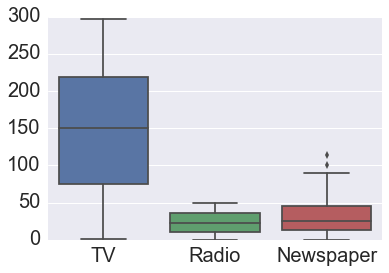

In [141]:
# We can also do: data2.boxplot()

sns.boxplot(data=data[['TV', 'Radio', 'Newspaper']]);

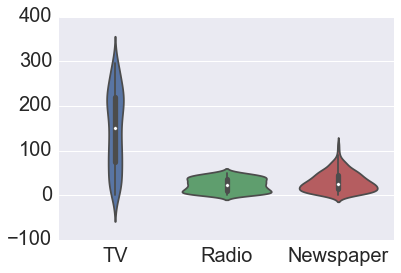

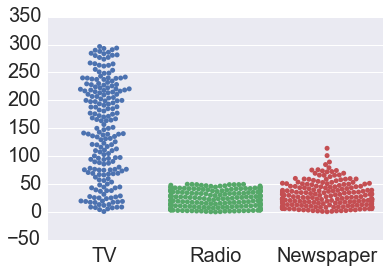

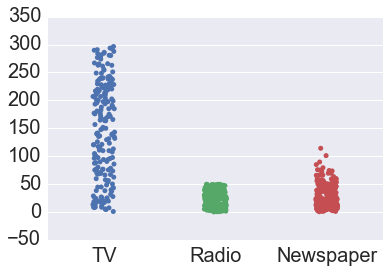

In [145]:
# Note similar syntax for related plot types:
sns.violinplot(data=data[['TV', 'Radio', 'Newspaper']]);

plt.figure() # Prevent overlaying on same plot

sns.swarmplot(data=data[['TV', 'Radio', 'Newspaper']]);
plt.figure()
sns.stripplot(data=data[['TV', 'Radio', 'Newspaper']], jitter=True);

##### Create a regplot plot of sales as a function of TV Spend

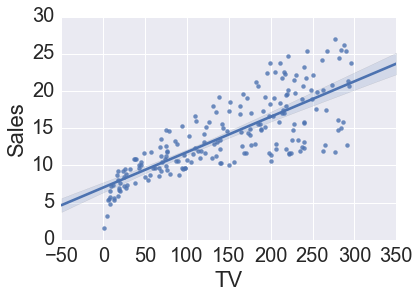

In [128]:
sns.regplot(data=data, x='TV', y='Sales', fit_reg=True);

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

#### Is there a relationship between TV ads and sales?

Answer: Yes, the P-value is nearly zero, so there's almost 100% chance that the regression is statistically significant.

#### Is this a causal relationship? Why or why not? 

Answer: Not necessarily, more information needed.

#### What other questions might you have about this data?

Answer:

Examples:
  - What are the units?
  - How was the data collected?

---

Let's use **Statsmodels** to estimate the association between advertising efforts and sales. 

In [129]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        06:29:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question: Is this a statistically meaningful correlation (Based on a 95% confidence interval)? How can you tell?

Answer: Again, yes, the P value is nearly zero and the 95% confidence interval does not include zero.

#### Question: In your own words, what does R-squared represent?
    
Answer: R-squared is the ratio of variance in the target variable that is explained by variance in our model. More concretely it's how closely the points in our dataset fit the line described by our model, where and R-squared of 1 indicates a perfect fit, and an R-squared of 0 indicates no meaningful fit.

### Are there any questions you have for us?

In [130]:
# In class examples. Selecting values in our dataset above or below 2 standard devs from the mean.
sales_mean = data[['Sales']].mean()
sales_std = data[['Sales']].std()

print sales_mean # 14.02
print sales_std # 5.217

values_above_1_std = data[['Sales']] > sales_mean + 2 * sales_std
values_below_1_std = data[['Sales']] < sales_mean - 2 * sales_std

pd.concat([data, values_above_1_std], axis=1)

data[values_above_1_std['Sales'] | values_below_1_std['Sales']]

Sales    14.0225
dtype: float64
Sales    5.217457
dtype: float64


,TV,Radio,Newspaper,Sales
37,266.9,43.8,5.0,25.4
99,289.7,42.3,51.2,25.4
129,220.3,49.0,3.2,24.7
131,0.7,39.6,8.7,1.6
148,243.2,49.0,44.3,25.4
156,4.1,11.6,5.7,3.2
176,276.9,48.9,41.8,27.0
184,287.6,43.0,71.8,26.2
199,283.6,42.0,66.2,25.5
